# Counterfactual policy simulations

In [ ]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Deduction

In [2]:
x = np.linspace(0,2,10) # deduction from 0 to 200.000 DKR
Fradrag = {}

In [ ]:
SingleEst = SMD.load_est(name='Single')
Single = RetirementClass(**SingleEst)
Fradrag['Single'] = figs.resolve(Single,vars=['d,GovS'],recompute=True,fradrag=x)
del Single

In [ ]:
CoupleEst,SingleEst = SMD.load_est(name='Couple',couple=True)
CoupleEst['simN'] = 1e6
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
Fradrag['Couple'] = figs.resolve_c(Couple, vars=['d,GovS'], recompute=True, fradrag=x)
del Couple

In [ ]:
RestCoupleEst,RestSingleEst = SMD.load_est(name='RestCouple',couple=True)
RestCoupleEst['simN'] = 1e6
RestCouple = RetirementClass(couple=True, single_kwargs=RestSingleEst, **RestCoupleEst)
Fradrag['RestCouple'] = figs.resolve_c(RestCouple, vars=['d,GovS'], recompute=True, fradrag=x)
del RestCouple

### Retirement age

In [ ]:
age = (65,62,60)
ages_dict = {'oap_age':   [i+age[0] for i in range(6)],
             'two_year':  [i+age[1] for i in range(6)],
             'erp_age':   [i+age[2] for i in range(6)]}
RetAge = {}

In [ ]:
SingleEst = SMD.load_est(name='Single')
Single = RetirementClass(**SingleEst)
RetAge['Single'] = figs.resolve(Single,vars=['d,GovS'],recompute=True,**ages_dict)
del Single

In [ ]:
CoupleEst,SingleEst = SMD.load_est(name='Couple',couple=True)
CoupleEst['simN'] = 1e6
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
RetAge['Couple'] = figs.resolve_c(Couple, vars=['d,GovS'], recompute=True, **ages_dict)
del Couple

In [ ]:
RestCoupleEst,RestSingleEst = SMD.load_est(name='RestCouple',couple=True)
RestCoupleEst['simN'] = 1e6
RestCouple = RetirementClass(couple=True, single_kwargs=RestSingleEst, **RestCoupleEst)
RetAge['RestCouple'] = figs.resolve_c(RestCouple, vars=['d,GovS'], recompute=True, **ages_dict)
del RestCouple

Couple model

In [ ]:
CoupleEst,SingleEst = funs.load_est(name='Couple',couple=True)
CoupleEst['simN'] = 1000000
SingleEst['simN'] = 1000000
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
Fradrag['Couple'] = figs.resolve_c(Couple, vars=['d'], recompute=True, fradrag=x)
del Couple

Restricted couple model

In [ ]:
RestCoupleEst,RestSingleEst = funs.load_est(name='RestCouple',couple=True)
RestCoupleEst['simN'] = 1000000
RestSingleEst['simN'] = 1000000
RestCouple = RetirementClass(couple=True, single_kwargs=RestSingleEst, **RestCoupleEst)
Fradrag['RestCouple']=figs.resolve_c(RestCouple, vars=['d'], recompute=True, fradrag=x)
del RestCouple

Results for labor supply

In [ ]:
LS = [Fradrag['Single']['d'], Fradrag['Couple']['d'], Fradrag['RestCouple']['d']]
for j in range(len(LS)):
    LS[j] =[(i/LS[j][0]-1)*100 for i in LS[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Deduction (100.000 DKR)'
ylab = 'Relative change (labor supply)'

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(x[1:],LS,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/DeductionLaborSupply.png')

Results for goverment surplus

In [ ]:
GS = [Fradrag['Single']['?'], Fradrag['Couple']['?'], Fradrag['RestCouple']['?']]
for j in range(len(GS)):
    GS[j] =[(i/GS[j][0]-1)*100 for i in GS[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Deduction (100.000 DKR)'
ylab = 'Relative change (labor supply)'

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(x[1:],GS,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/DeductionGovSurplus.png')

Results for welfare

Clean up

In [ ]:
%reset -f

# Increase retirement age

In [ ]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
oap = 65
two_year = 62
erp = 60
ages_dict = {'oap_age':   [i+oap for i in range(6)],
             'two_year':  [i+two_year for i in range(6)],
             'erp_age':   [i+erp for i in range(6)]}
RetAge = {}

Single model

In [ ]:
SingleEst = funs.load_est(name='Single')
Single = RetirementClass(SingleEst)
RetAge['Single'] = figs.resolve(Single, vars=['d'], recompute=True, **ages_dict)
del Single # to save memory

Couple model

In [ ]:
CoupleEst,SingleEst = funs.load_est(name='Couple',couple=True)
CoupleEst['simN'] = 1000000
SingleEst['simN'] = 1000000
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
RetAge['Couple'] = figs.resolve_c(Couple, vars=['d'], recompute=True, **ages_dict)
del Couple

Restricted couple model

In [ ]:
RestCoupleEst,RestSingleEst = funs.load_est(name='RestCouple',couple=True)
RestCoupleEst['simN'] = 1000000
RestSingleEst['simN'] = 1000000
RestCouple = RetirementClass(couple=True, single_kwargs=RestSingleEst, **RestCoupleEst)
RetAge['RestCouple']=figs.resolve_c(RestCouple, vars=['d'], recompute=True, **ages_dict)
del RestCouple

Results for labor supply

In [ ]:
LS = [RetAge['Single']['d'], [RetAge['Couple']['d'], [RetAge['RestCouple']['d']]
for j in range(len(LS)):
    LS[j] =[(i/LS[j][0]-1)*100 for i in LS[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Deduction (100.000 DKR)'
ylab = 'Relative change (labor supply)'

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(np.arange(1,6),LS,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/RetAgeLaborSupply.png')

Results for goverment surplus

In [ ]:
GS = [RetAge['Single']['?'], RetAge['Couple']['?'], RetAge['RestCouple']['?']]
for j in range(len(GS)):
    GS[j] =[(i/GS[j][0]-1)*100 for i in GS[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Deduction (100.000 DKR)'
ylab = 'Relative change (labor supply)'

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(np.arange(1,6),GS,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/RetAgeGovSurplus.png')

Results for welfare

In [ ]:
Yf = [policyF_S['d'], policyF_C['d'], policyF_CR['d']]
for j in range(len(Y)):
    Yf[j] = [(i/Yf[j][0]-1)*100 for i in Yf[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Deduction (100.000 DKR)'
ylab = 'Relative change (labor supply)'

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(x[1:],Y,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/DeductionLaborSupply.png')

In [2]:
#with open('estimates/Single.pickle', 'rb') as handle:
#    SingleEst = pickle.load(handle)
#Single = RetirementClass(SingleEst)
#Single.solve()
#Single.simulate()

Couple model

In [ ]:
RestCoupleEst,RestSingleEst = funs.load_est(name='RestCouple',couple=True)
RestCouple = RetirementClass(couple=True, single_kwargs=RestSingleEst, **RestCoupleEst)
Fradrag[:,2]=figs.resolve(RestCouple, vars=['d'], recompute=True, fradrag=x)

In [3]:
#with open('estimates/Couple.pickle', 'rb') as handle:
#    CoupleEst = pickle.load(handle)
# Remember the single_kwargs!!!
#Couple = RetirementClass(couple=True)
#Couple.solve()
#Couple.simulate()

Restricted Couple model

In [ ]:
CoupleRestEst,SingleRestEst = funs.load_est(name='CoupleRest',couple=True)
CoupleRest = RetirementClass(couple=True, single_kwargs=SingleRestEst, CoupleRestEst)
CoupleRest.solve()
CoupleRest.simulate()

In [22]:
#with open('estimates/CoupleRest.pickle', 'rb') as handle:
#    CoupleRestEst = pickle.load(handle)
# Remember the single_kwargs!!!
#CoupleRest = RetirementClass(couple=True, phi_0_male=0.0, phi_0_female=0.0, phi_1=0.0)
#CoupleRest.solve()
#CoupleRest.simulate()

Resolve model for different deductions

In [6]:
x = np.linspace(0,2,10)
policyF_S = figs.resolve(Single, vars=['d'], recompute=True, fradrag=x)

In [7]:
policyF_C = figs.resolve_c(Couple, vars=['d'], recompute=True, fradrag=x)

In [24]:
policyF_CR = figs.resolve_c(CoupleRest, vars=['d'], recompute=True, fradrag=x)

In [25]:
Yf = [policyF_S['d'], policyF_C['d'], policyF_CR['d']]
for j in range(len(Y)):
    Yf[j] = [(i/Yf[j][0]-1)*100 for i in Yf[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Deduction (100.000 DKR)'
ylab = 'Relative change (labor supply)'

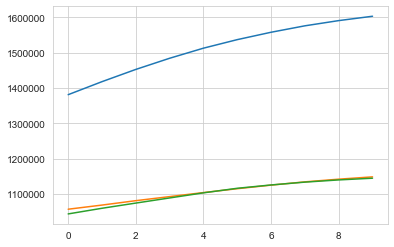

In [38]:
plt.plot(policyF_CR['d'])
plt.plot(policyF_C['d'])
plt.plot(np.array(policyF_S['d'])*2)

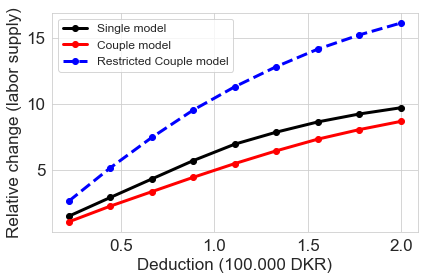

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(x[1:],Y,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/DeductionLaborSupply.png')

Clean up

In [ ]:
%reset

# Increase retirement age

Single model

In [2]:
SingleEst = funs.load_est(name='Single')
Single = RetirementClass(SingleEst)
Single.solve()
Single.simulate()

Couple model

In [3]:
CoupleEst,SingleEst = funs.load_est(name='Couple',couple=True)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, CoupleEst)
Couple.solve()
Couple.simulate()

Restricted Couple model

In [4]:
CoupleRestEst,SingleRestEst = funs.load_est(name='CoupleRest',couple=True)
CoupleRest = RetirementClass(couple=True, single_kwargs=SingleRestEst, CoupleRestEst)
CoupleRest.solve()
CoupleRest.simulate()

Resolve model for different retirement ages

In [6]:
oap = 65
two_year = 62
erp = 60
kwarg_dict = {'oap_age':   [oap, oap+1, oap+2, oap+3, oap+4, oap+5],
              'two_year':  [two_year, two_year+1, two_year+2, two_year+3, two_year+4, two_year+5],
              'erp_age':   [erp, erp+1, erp+2, erp+3, erp+4, erp+5]}
policyRA_S = figs.resolve(Single,vars=['d'],recompute=True, **kwarg_dict)

In [7]:
policyRA_C = figs.resolve_c(Couple,vars=['d'],recompute=True, **kwarg_dict)

MemoryError: 

In [ ]:
policyRA_CR = figs.resolve_c(CoupleRest,vars=['d'],recompute=True, **kwarg_dict)

In [ ]:
x = [1,2,3,4,5]
Yra = [policyRA_S['d'], policyRA_C['d'], policyRA_CR['d']]
for j in range(len(Y)):
    Yra[j] = [(i/Yra[j][0]-1)*100 for i in Yra[j][1:]] # list comprehension to compute relative change
names = ['Single model', 'Couple model', 'Restricted Couple model']
xlab = 'Increase in age (years)'
ylab = 'Relative change (labor supply)'

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
figs.plot_exp(x[1:],Yra,ax,names,xlab,ylab)
fig.tight_layout()
fig.savefig('figs/Experiments/DeductionLaborSupply.png')

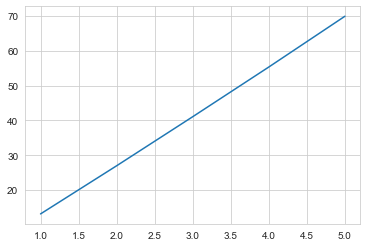

In [49]:
x = [1,2,3,4,5]
y = policy_age['d']
y = [(i/y[0]-1)*100 for i in y[1:]]
plt.plot(x,y)

# Couple model

In [3]:
model = RetirementClass(couple=True)
model.solve()
model.simulate()

In [3]:
fradrag = model.par.fradrag # to reset
x = np.linspace(0,2,10)
policy_fradrag = figs.resolve_c(model,vars=['d'],recompute=True, fradrag=x)
model.par.fradrag = fradrag
model.solve(recompute=True)

In [ ]:
phi_0_male = model.par.phi_0_male
phi_0_female = model.par.phi_0_female
phi_1 = model.par.phi_1
model.par.phi_0_male = 0.0
model.par.phi_0_female = 0.0
model.par.phi_1 = 0.0

policy_fradrag_partial = figs.resolve_c(model,vars=['d'],recompute=True, fradrag=x)
model.par.fradrag = fradrag
model.par.phi_0_male = phi_0_male
model.par.phi_0_female = phi_0_female
model.par.phi_1 = phi_1
model.solve(recompute=True)

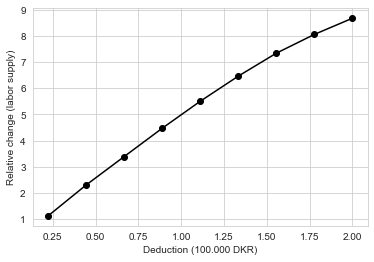

In [23]:
x = np.linspace(0,2,10)
y = policy_fradrag['d']
y = [(i/y[0]-1)*100 for i in y[1:]]
y_partial = policy_fradrag_partial['d']
y_partial = [(i/y_partial[0]-1)*100 for i in y_partial[1:]]
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x[1:],y,'k-o', label='Baseline')
ax.plot(x[1:],y_partial,'k-o', label='Without complementarities')
ax.set_ylabel('Relative change (labor supply)')
ax.set_xlabel('Deduction (100.000 DKR)')
fig.savefig('figs/experiment_full_couple_fradrag_labor_supply.png')

In [4]:
oap = model.par.oap_age
two_year = model.par.two_year
erp = model.par.erp_age
kwarg_dict = {'oap_age':   [oap, oap+1, oap+2, oap+3, oap+4, oap+5],
              'two_year':  [two_year, two_year+1, two_year+2, two_year+3, two_year+4, two_year+5],
              'erp_age':   [erp, erp+1, erp+2, erp+3, erp+4, erp+5]}
policy_age = figs.resolve_c(model,vars=['d'],recompute=True, **kwarg_dict)
model.par.oap_age = oap
model.par.two_year = two_year
model.par.erp_age = erp
model.solve(recompute=True)

In [5]:
phi_0_male = model.par.phi_0_male
phi_0_female = model.par.phi_0_female
phi_1 = model.par.phi_1
model.par.phi_0_male = 0.0
model.par.phi_0_female = 0.0
model.par.phi_1 = 0.0

policy_age_partial = figs.resolve_c(model,vars=['d'],recompute=True, **kwarg_dict)
model.par.oap_age = oap
model.par.two_year = two_year
model.par.erp_age = erp
model.par.phi_0_male = phi_0_male
model.par.phi_0_female = phi_0_female
model.par.phi_1 = phi_1
model.solve(recompute=True)

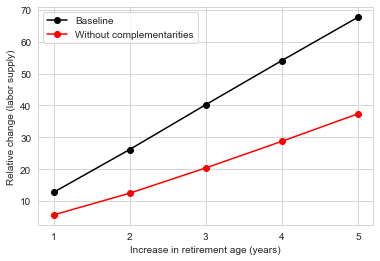

In [16]:
x = [1,2,3,4,5]
y = policy_age['d']
y = [(i/y[0]-1)*100 for i in y[1:]]
y_partial = policy_age_partial['d']
y_partial = [(i/y_partial[0]-1)*100 for i in y_partial[1:]]
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x,y,'k-o', label='Baseline')
ax.plot(x,y_partial,'r-o', label='Without complementarities')
ax.set_xticks(x)
ax.legend()
ax.set_ylabel('Relative change (labor supply)')
ax.set_xlabel('Increase in retirement age (years)')
fig.savefig('figs/experiment_full_couple_retirement_age_labor_supply.png')